# Model Evaluation

In [2]:
import pandas as pd

df = pd.read_csv('../data/processed/processed.csv')

drop_cols = ['customerid', 'transactionid', 'accountid', 'batchid', 'subscriptionid', 'transactionstarttime']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

X = df.drop(columns=['is_high_risk'])
y = df['is_high_risk']

X[X.select_dtypes(include='bool').columns] = X.select_dtypes(include='bool').astype(int)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


import joblib

logreg = joblib.load('../models/logreg_best.pkl')
rf = joblib.load('../models/random_forest_best.pkl')


In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"📊 {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_prob))
    print()

# Predict and evaluate
for model, name in [(logreg, "Logistic Regression"), (rf, "Random Forest")]:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    evaluate_model(name, y_test, y_pred, y_prob)


📊 Logistic Regression
Accuracy: 0.8850676841059949
Precision: 0.6153846153846154
Recall: 0.014473089099954772
F1 Score: 0.02828104286345559
ROC AUC: 0.8887637058339508

📊 Random Forest
Accuracy: 0.9937281137302043
Precision: 0.9720090293453725
Recall: 0.973767526006332
F1 Score: 0.9728874830546769
ROC AUC: 0.999491093596709



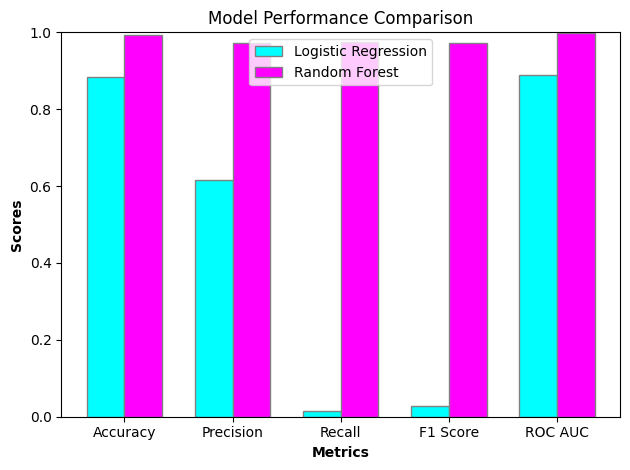

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data
models = ['Logistic Regression', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
logistic_scores = [0.885, 0.615, 0.014, 0.028, 0.889]
random_forest_scores = [0.994, 0.972, 0.974, 0.973, 0.999]

# Create a DataFrame for better handling (optional)
import pandas as pd

data = {
    'Metric': metrics,
    'Logistic Regression': logistic_scores,
    'Random Forest': random_forest_scores
}

df = pd.DataFrame(data)

# Set the position of bar on X axis
bar_width = 0.35
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]

# Create bars
plt.bar(r1, df['Logistic Regression'], color='cyan', width=bar_width, edgecolor='grey', label='Logistic Regression')
plt.bar(r2, df['Random Forest'], color='magenta', width=bar_width, edgecolor='grey', label='Random Forest')

# Add labels
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(metrics))], metrics)
plt.ylabel('Scores', fontweight='bold')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)  # Set y-axis limit

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

| Metric          | Logistic Regression       | Random Forest            |
|------------------|--------------------------|--------------------------|
| Accuracy          | 0.8851                   | 0.9937                   |
| Precision         | 0.6154                   | 0.9720                   |
| Recall            | 0.0145                   | 0.9738                   |
| F1 Score          | 0.0283                   | 0.9729                   |
| ROC AUC          | 0.8888                   | 0.9995                   |